<a href="https://colab.research.google.com/github/juwimana/Surrey-Crime-and-Collision-Incidents/blob/main/Surrey_Crime_and_Collision_Incidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Surrey](https://https://www.surrey.ca/) Crime and Collision Incidents 2019 Analysis**
Today, I will be an analyizing the Crime and Collison Incidents 2019 [Data Set](https://data.surrey.ca/dataset/rcmp-crime/resource/130f817c-0940-4cbe-bac8-90dac92f0670) for Surrey (British Columbia) in search of insights and a better understanding of Python as a tool for Data Science 

# Importing Data
Below, we will use [Python Pandas](https://pandas.pydata.org/docs/index.html) to import our csv formated data from a Github URL and read it into a Pandas Dataframe using the Pandas [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv) function. 

In [1]:
#import data analysis packages
import pandas as pd
import numpy as np

#import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the data from Github URL
ccc19 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202019', sep='\t')
ccc18 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collisions%20Incidents%202018',sep ='\t')
ccc17 = pd.read_csv('https://raw.githubusercontent.com/juwimana/Surrey-Crime-and-Collision-Incidents/main/Crime%20and%20Collision%20Incidents%202017',sep ='\t')
csv_files = [ccc17, ccc18, ccc19]
ccc = ccc17.append(csv_files)
ccc

# Initial Exploration Data Analysis (EDA)
In this section, I will be familiarizing myself with the data set and understand the structure it's currently in along with any insights

In [4]:
#View first few lines of data set
ccc.head()

,INCIDENT_TYPE,HUNDRED_BLOCK,MONTH,YEAR,FILE_NUMBER
0,Fatal/Injury Collision,12000 NEW MCLELLAN RD,1,2017,17-51
1,Fatal/Injury Collision,6100 192ND ST,1,2017,17-139
2,Fatal/Injury Collision,2800 BLOCK CROYDON DR,1,2017,17-141
3,Fatal/Injury Collision,179TH ST / 96TH AVE,1,2017,17-151
4,Fatal/Injury Collision,179TH ST / 96TH AVE,1,2017,17-151


In [5]:
#use shape to check the size of our data (rows, columns)
ccc.shape 

(86105, 5)

Using the describe() method for practice purposes. Otherwise, doesn't provide insightful details on our data set, as result shows

In [6]:
#Use describe() method to understand the basic statistics of our data set
ccc.describe()

,MONTH,YEAR
count,86105.000000,86105.000000
mean,6.536833,2017.715336
std,3.478975,0.824205
min,1.000000,2017.000000
25%,3.000000,2017.000000
50%,7.000000,2017.000000
75%,10.000000,2018.000000
max,12.000000,2019.000000


In [7]:
#finding percent missing values
ccc.isna().mean()

INCIDENT_TYPE    0.000000
HUNDRED_BLOCK    0.000325
MONTH            0.000000
YEAR             0.000000
FILE_NUMBER      0.000000
dtype: float64

In [8]:
#finding the count of missing values for each column
ccc.isnull().sum()

INCIDENT_TYPE     0
HUNDRED_BLOCK    28
MONTH             0
YEAR              0
FILE_NUMBER       0
dtype: int64

Based on the above, we do not have any missing values to fill in, except for HUNDRED_BLOCK which is missing **28** values. However, since my analysis will not focus on locations of incident (HUNDRED_BLOCK), no filling is required. 

Therefore, I will delete both the HUNDRED_BLOCK and FILE_NUMBER. 

Let's do some deeper Exploration Data Analysis (EDA)

In [9]:
ccc.head()

,INCIDENT_TYPE,HUNDRED_BLOCK,MONTH,YEAR,FILE_NUMBER
0,Fatal/Injury Collision,12000 NEW MCLELLAN RD,1,2017,17-51
1,Fatal/Injury Collision,6100 192ND ST,1,2017,17-139
2,Fatal/Injury Collision,2800 BLOCK CROYDON DR,1,2017,17-141
3,Fatal/Injury Collision,179TH ST / 96TH AVE,1,2017,17-151
4,Fatal/Injury Collision,179TH ST / 96TH AVE,1,2017,17-151


In [10]:
#deleting column HUNDRED_BLOCK
del ccc['HUNDRED_BLOCK']

In [11]:
#checking for successful deletion of column
ccc.head()

,INCIDENT_TYPE,MONTH,YEAR,FILE_NUMBER
0,Fatal/Injury Collision,1,2017,17-51
1,Fatal/Injury Collision,1,2017,17-139
2,Fatal/Injury Collision,1,2017,17-141
3,Fatal/Injury Collision,1,2017,17-151
4,Fatal/Injury Collision,1,2017,17-151


In [12]:
#deleting column HUNDRED_BLOCK
del ccc['FILE_NUMBER']

In [13]:
#checking for successful deletion of column
ccc.head()

,INCIDENT_TYPE,MONTH,YEAR
0,Fatal/Injury Collision,1,2017
1,Fatal/Injury Collision,1,2017
2,Fatal/Injury Collision,1,2017
3,Fatal/Injury Collision,1,2017
4,Fatal/Injury Collision,1,2017


# Deeper EDA
In this section, we will use visualizations to help understand our data set

In [14]:
ccc.head()

,INCIDENT_TYPE,MONTH,YEAR
0,Fatal/Injury Collision,1,2017
1,Fatal/Injury Collision,1,2017
2,Fatal/Injury Collision,1,2017
3,Fatal/Injury Collision,1,2017
4,Fatal/Injury Collision,1,2017


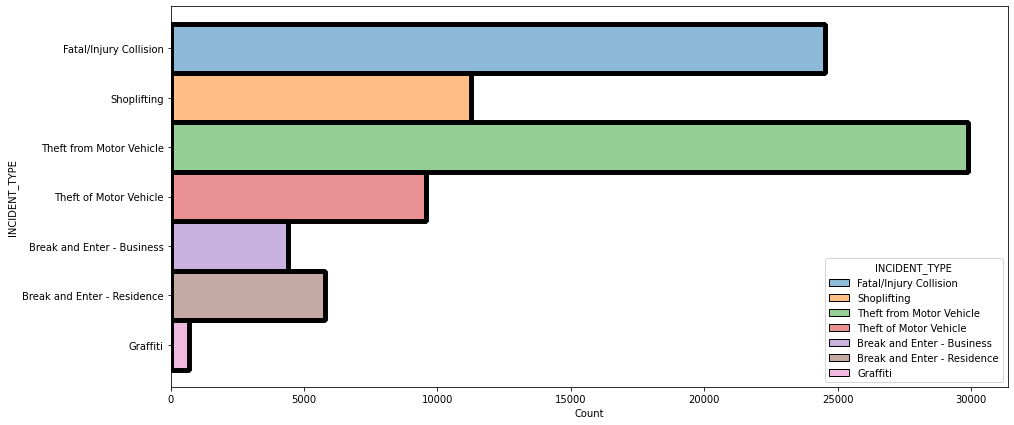

In [15]:
#How is the incident type distibuted in Surrey
plt.rcParams["figure.figsize"] = (15,7)
sns.histplot(data=ccc['INCIDENT_TYPE'], y=ccc['INCIDENT_TYPE'], hue=ccc['INCIDENT_TYPE']);

For the past three years (2017, 2018, 2019):
*   Theft from Motor Vehicle was the most frequent incident type with Fatal/Injury collision a close second
*   Gaffiti was the least incident type 


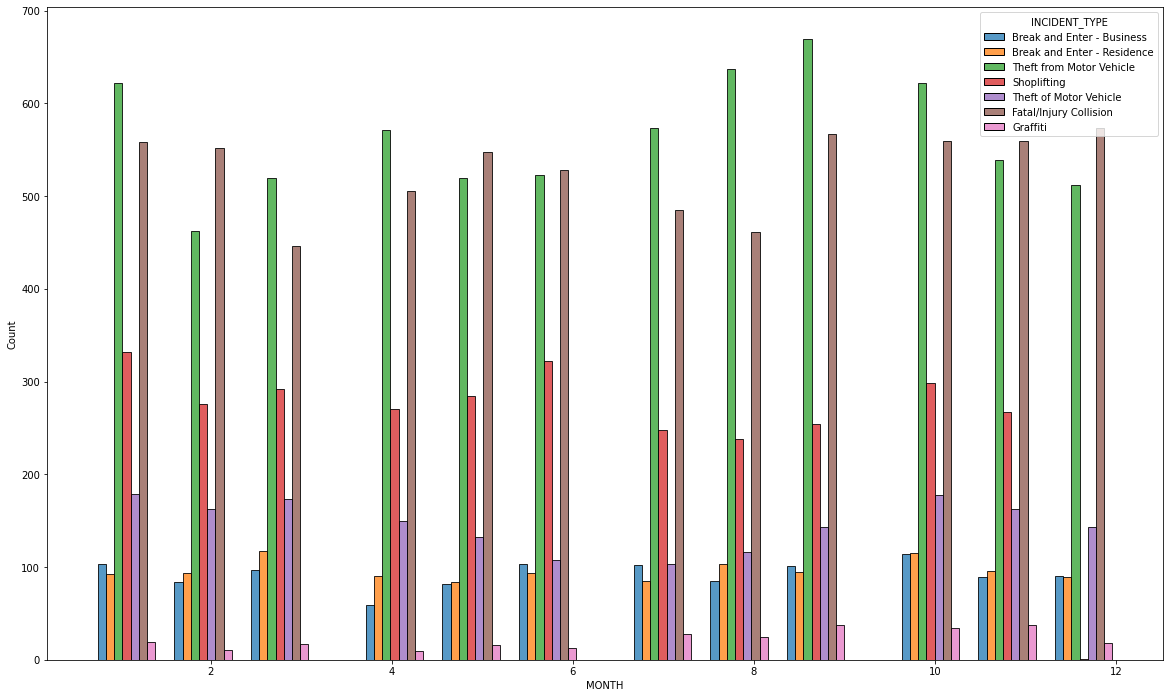

In [ ]:
#How is the incident type in Surrey distributed by month in Surret
plt.rcParams["figure.figsize"] = (20,12)
sns.histplot(data=ccc['MONTH'], x=ccc['MONTH'], hue=ccc['INCIDENT_TYPE'], multiple='dodge',shrink=1.5);

In 2019:

*   Theft from Motor Vehicle and Fatal/Injury Collison incidents were relatively high and even distrubuted
*   Graffiti was low and incidentes evenly distributed
*   December hardly had any Shoplifting incidents
*   All incidents were evenly distributed over the year



